La méthode de pénalisation extérieure pour résoudre le problème suivant 

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   3x_1^2+2x_1x_2+2x_2^2-6x_1-9x_2\\[1mm]
-3x_1+6x_2\leqslant 9   \\
-2x_1+\phantom{6}x_2\leqslant 1   \\
x_1,x_2\geqslant 0.
\end{array}
\end{equation*}

In [1]:
using Optim, Plots, Ipopt, JuMP, LinearAlgebra

In [2]:
f(x) = 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2]

	
df(x) = [6x[1]+2x[2]-6, 4x[2]+2x[1]-9]

	
function g1(x,y)
	return -3x+6y
end
	
function g2(x,y)
	return -2x+y
end

g2 (generic function with 1 method)

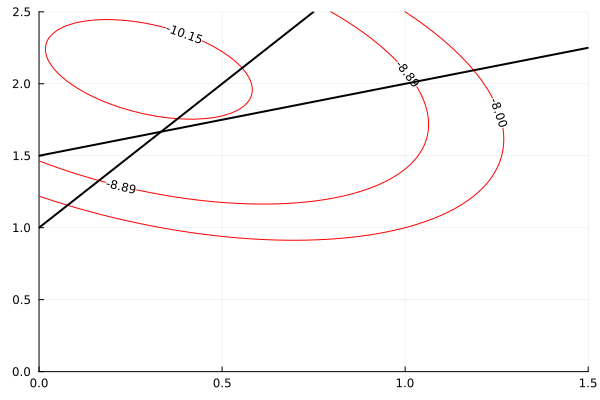

In [3]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff[i,j] = f([x[i], y[j]])
    end
end


contour(x, y, ff', levels = [-10.15,-8.89, -8], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(x,y,g1, levels=[9], color="black", linewidth=2 )
contour!(x,y, g2, levels=[1], color="black", linewidth=2)

In [11]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2] >= 0)

# définition de la fonction objectif
@NLobjective(modele, Min, 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2])

# définition des contraintes
@constraint(modele, -3x[1]+6x[2] <= 9)
@constraint(modele, -2x[1]+x[2] <= 1)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")

objective_value(modele) = -10.125000012513723
solution = [0.49999999678061535, 1.7500000109040321]


In [5]:
μ = .1
ρ = 10
x0 = [0.0, 100]

2-element Vector{Float64}:
   0.0
 100.0

In [6]:
g(x) = [max(0, g1(x[1], x[2])-9)^2, max(0, g2(x[1], x[2])-6)^2, max(0, -x[1])^2, max(0, -x[2])^2]
dg(x) = [2*max(0,g1(x[1],x[2])-9), 2*max(0, g2(x[1], x[2])-6), 2*max(0, -x[1]), 2*max(0, -x[2])]

dg (generic function with 1 method)

In [39]:
# on définit la fonction f(x)+\mu P(x)
fmu(x) = f(x) + μ*sum(g(x))

fmu (generic function with 1 method)

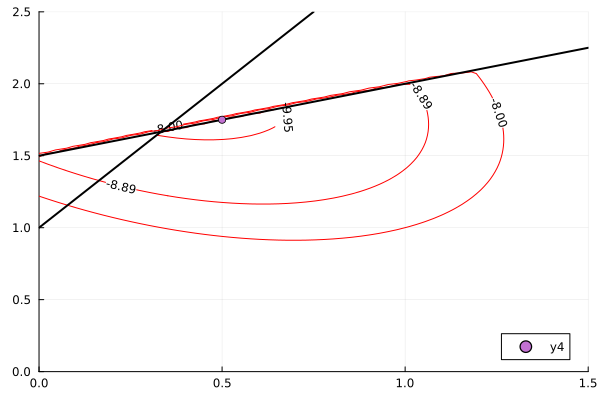

In [40]:
nx = 200
ny = 199
xx = range(0,5, length=nx)
yy = range(0,5, length=ny)
fm = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        fm[i,j] = fmu([xx[i], yy[j]])
    end
end


contour(xx, yy, fm', levels = [-9.95,-8.89, -8], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(xx,yy,g1, levels=[9], color="black", linewidth=2 )
contour!(xx,yy, g2, levels=[1], color="black", linewidth=2)
scatter!([value.(x)[1]], [value.(x)[2]])

In [41]:
res = Optim.optimize(fmu, x0, LBFGS());

In [42]:
x0 = res.minimizer

2-element Vector{Float64}:
 0.4999382906604646
 1.750107991365582

In [43]:
# Calcul des multiplicateurs de Lagrange
λ = μ*dg(x0)

4-element Vector{Float64}:
 0.1666152424196099
 0.0
 0.0
 0.0

In [44]:
μ = ρ*μ

1000.0

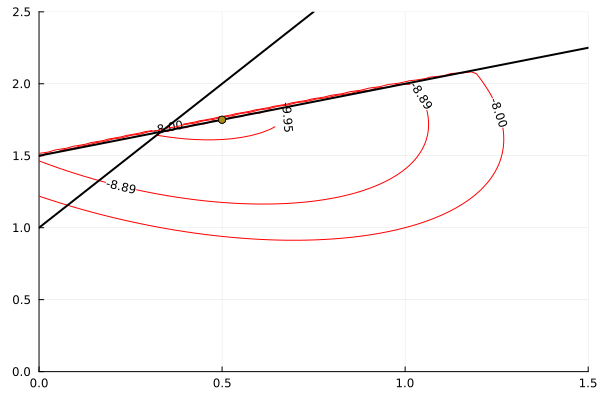

In [45]:
scatter!((x0[1], x0[2]), legend=false)

In [46]:
μ*sum(g(x0))

0.0006940159751636344

Méthode de pénalisation extérieure pour résoudre le problème suivant 

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   (x_1-2)^4+(x_1-2x_2)^2\\[1mm]
x_1^2-x_2 = 0.
\end{array}
\end{equation*}

In [47]:
f2(x) = (x[1]-2)^4+(x[1]-2x[2])^2

	
#df(x) = [6x[1]+2x[2]-6, 4x[2]+2x[1]-9]

	
function g1(x,y)
	return x^2-y
end

g1 (generic function with 1 method)

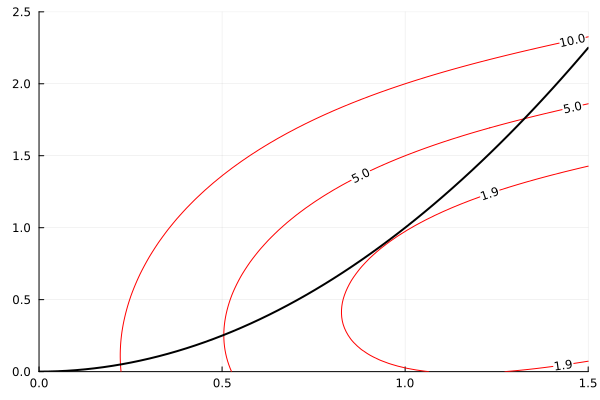

In [48]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff2 = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff2[i,j] = f2([x[i], y[j]])
    end
end


contour(x, y, ff2', levels = [1.9,5,10], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(x,y,g1, levels=[0], color="black", linewidth=2 )

In [49]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2])

# définition de la fonction objectif
@NLobjective(modele, Min, (x[1]-2)^4+(x[1]-2x[2])^2)

# définition des contraintes
@NLconstraint(modele, x[1]^2-x[2] == 0)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")

objective_value(modele) = 1.9461837103036448
solution = [0.9455829934427449, 0.8941271974468595]


In [50]:
μ = 1
ρ = 10
x0 = [100, 100.0]
dg(x) = 2*(x[1]^2-x[2])

dg (generic function with 1 method)

In [78]:
f2m(x) = f2(x) + μ*(x[1]^2-x[2])^2

f2m (generic function with 1 method)

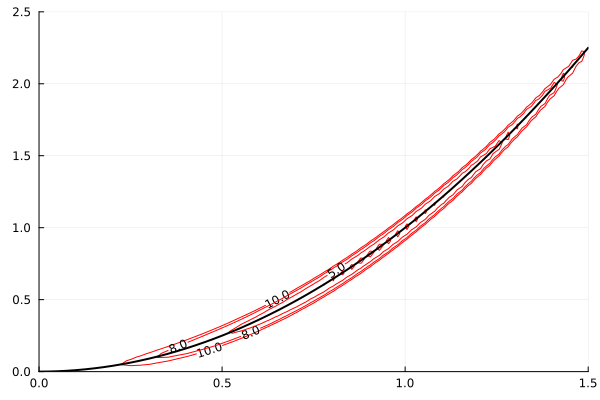

In [79]:
nx = 200
ny = 199
xx = range(0,5, length=nx)
yy = range(0,5, length=ny)
fm2 = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        fm2[i,j] = f2m([xx[i], yy[j]])
    end
end


contour(xx, yy, fm2', levels = [2.5,5, 8, 10], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(xx,yy,g1, levels=[0], color="black", linewidth=2 )

In [80]:
res = Optim.optimize(f2m, x0);

In [81]:
x0 = res.minimizer

2-element Vector{Float64}:
 0.9460999276609983
 0.8934229347529488

In [82]:
# Calcul des multiplicateurs de Lagrange
λ = μ*dg(x0)

3.3642767343948776

In [83]:
μ = ρ*μ

10000

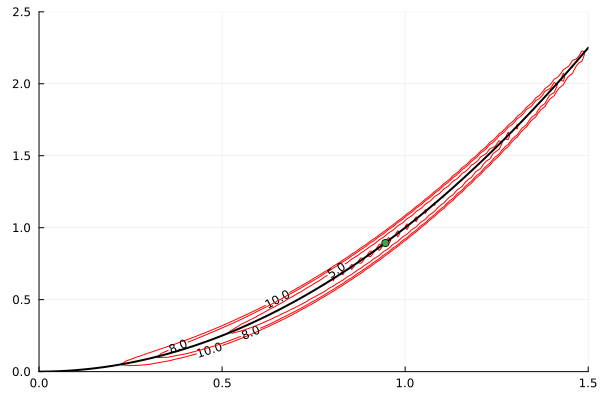

In [84]:
scatter!((x0[1], x0[2]), legend=false)

In [85]:
norm(x0-value.(x))

0.000873617151866707

In [86]:
μ*(x0[1]^2-x0[2])^2

0.028295894863976656